# Project: Investigate a Dataset (Factors Affected the Number of Titanic's Survivals)


## Table of Contents 

1. [Introduction](#int)
2. [Importing Necessary Libraries](#imp)
3. [Reading and Exploring the Dataset](#red)
4. [Variables Definition and Level of Measurements](#vd)
5. [Finding Missing Values in the Dataset](#na)
6. [Exploring Continuous Variables](#ecv)<br>
  6.1. [Descriptive Statistics](#ds)<br>
  6.2. [Histograms](#his)<br>
  6.3. [Explaining the Histograms](#ehist)<br>
  6.4. [Further Investigation on Fare Variable](#ff)<br>
  6.5. [Further Investigation on Parch Variable](#fp)<br>
7. [Finding and Dealing with Outliers](#out)<br>
  7.1. [Boxplots](#bp)<br>
  7.2. [Explaining the Boxplots](#ebp)<br>
  7.3. [Winsorizing Variables with Outliers](#won)<br>
8. [Exploring Categorical Variables](#egv)<br>
9. [Inferential Statistics](#is)<br>
  9.1. [Hypothesis Statement](#hs)<br>
  9.2. [Statistical Test](#st)<br>
10. [Conclusion](#co)
11. [References](#rf)

<a id='int'></a>
## Introduction

Titanic is a British ocean liner who sank in North Atlantic Ocean early morning on April 15, 1912 after hitting an iceberg during her voyage from Southampton to New York City.<br>
There were 2224 passengers and crews, and 1500 has died. Although Titanic had advanced safety features, such as watertight compartments and remotely activated watertight doors, there were not enough lifeboats to accommodate all passengers; the number of lifeboats available was only 1178.<br>
Titanic called at Cherbourg in France and Queenstown in Ireland on her way west to New York.<br>

In this project, I am going to see whether the number of survivals was affected by any factors. After exploring the data and learning more about the variables, I will decide the type of the statistical test and conduct my hypothesis statement<br>


## Importing Necessary Libraries
<a id=imp></a>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set(color_codes=True)

<a id='red'></a>
## Reading and Exploring the Dataset

In [2]:
titanic_original=pd.read_csv('titanic-data.csv')
titanic_original.shape

(891, 12)

We can see that the dataset has 891 rows and 12 columns. I also like to get more information about the dataset, such as the names of variables, data types, and the number of non-missing values as follows:

In [3]:
titanic_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Let's explore the dataset by viewing the first five rows

In [4]:
titanic_original.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


After printing the first five rows of the dataset, I found that **Survived** has values of 0 and 1. I think it is better to replace those values with more meaningful values such as No and Yes, so I will update the original DataFrame as follows:

In [5]:
 titanic_original['Survived']=titanic_original['Survived'].replace([0,1],['No','Yes'])


Let's re-print the first five rows of the dataset

In [6]:
titanic_original.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id='vd'></a>
## Variables Definition and Level of Measurements
Most of the definitions  are taken from __[kaggle](<https://www.kaggle.com/c/titanic/data>)__ <br>
-  **Passengerid**: Unique ID for each passenger, *(nominal)*
-  **Survived**: Survival (0=No, 1=Yes), *(nominal)*
-  **Pclass**: Ticket class(1=1st, 2=2nd, 3=3rd), *(ordinal)*
-  **Name**: Passenger name, *(nominal)*
-  **Sex**: Passenger sex, *(nominal)*
-  **Age**: Age in years, *(ratio)*
-  **SibSp**: # of siblings / spouses aboard the Titanic, *(ratio)*
-  **Parch**: # of parents / children aboard the Titanic, *(ratio)*
-  **Ticket**: Passenger ticket number, *(nominal)*
-  **Fare**: Passenger fare value, *(ratio)*
-  **Cabin**: Cabin number, *(nominal)*
-  **Embarked**: Port of embarkation, *(nominal)* 

So we have **eight** categorical  variables and **four** numeric.

    

<a id='na'></a>
## Finding Missing Values in the Dataset
Although I was able to see the number of non-missing values for each variable using `info()` method, I like to see the number of missing values instead by creating `find_missing_df` function. 

In [7]:
# Create a function that returns the number of missing values for one variable/column
def find_missing_col(column):
    return len(column[pd.isnull(column)])

# Create a function that returns the number of missing values for the DataFrame
def find_missing_df(df):
    return df.apply(find_missing_col)

In [8]:
find_missing_df(titanic_original)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we can see, we have only three variables with missing values: `Age`, `Cabin`, and `Embarked`. `Cabin` has a large amount of missing values so I will definitely not consider this variable for further analysis. Now, despite `Age` has 177 missing values, which is only about 20% of the total data, I may still want to consider it for my analysis, so I will remove rows with those missing values and create a new dataset, `titanic`.

In [9]:
# Create a new DataFrame after dorpping all the rows where Age values are missing
titanic=titanic_original.dropna(subset=['Age'])
len(titanic)

714


The length of the new dataset is 714, which makes sense since our original dataset was 891 and we removed 177. Now, I will work on the new dataset `titanic`.

<a id='ecv'></a>
## Exploring Continuous Variables

<a id='ds'></a>
### Descriptive Statistics
Since we have eight categorical variables, I will remove them and create a new dataset, `titanic_numeric` DataFrame  with only numeric variables to get some descreptive statistics.

In [10]:
titanic_numeric=titanic[['Age','Fare','SibSp','Parch']]

In [11]:
titanic_numeric.describe()

,Age,Fare,SibSp,Parch
count,714.000000,714.000000,714.000000,714.000000
mean,29.699118,34.694514,0.512605,0.431373
std,14.526497,52.918930,0.929783,0.853289
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,8.050000,0.000000,0.000000
50%,28.000000,15.741700,0.000000,0.000000
75%,38.000000,33.375000,1.000000,1.000000
max,80.000000,512.329200,5.000000,6.000000


From the table above we can notice that `Fare`, `SibSp`, and `Parch` are highly skewed to the right since the mean is way larger than the median, i.e., the 50 percentile. However, I still like to create histograms to get a better sense of the distribution.

<a id='hist'></a>
### Histograms

In [12]:
def histogram(data, column, title, bins):
    """ Returns histogram and its title"""
    
    title=plt.title(title, weight='bold', fontsize=18)
    plt.ylabel('Frequency')
    ax=sns.distplot(data[column], kde=False, bins=bins)
    return ax, title

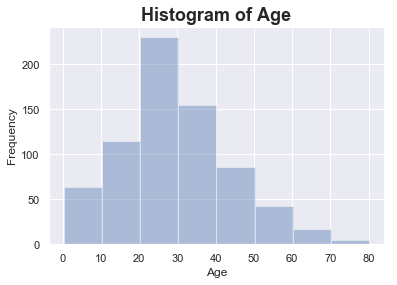

In [13]:
histogram(titanic,'Age', 'Histogram of Age', 8);

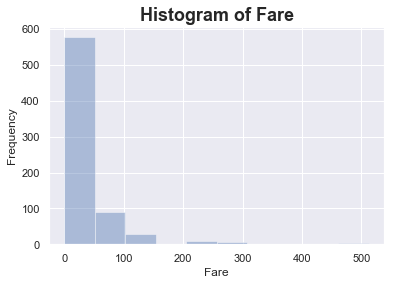

In [14]:
histogram(titanic, 'Fare', 'Histogram of Fare', 10);

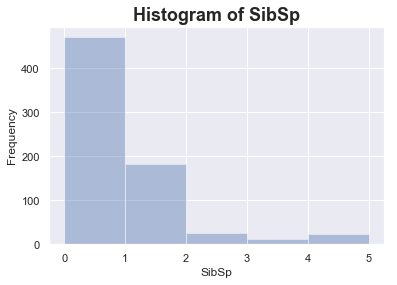

In [15]:
histogram(titanic, 'SibSp', 'Histogram of SibSp', 5);

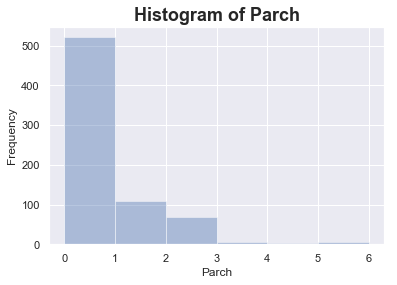

In [16]:
histogram(titanic, 'Parch', 'Histogram of Parch', 6);

<a id='ehist'></a>
### Explaining the Histograms
From the above histograms:<br>
`Age` is slightly skewed to the right which can be approximated by a normal distribution, and the most frequent ages are between 20 and 30.<br>  `Fare` is highly skewed to the right and the most frequent fare is between 0 and 50 USD. However, I am wondering how it could equal to zero since the passenger should have paid to get his/her ticket, so I will further investigate.<br>  `SibSp` is also highly skewed to the right, and it seems that the highest number of passengers did not have a spouse or sibling.<br> `Parch` is also highly skewed to the right and the highest number of passengers have `Parch` equals to zero. My initial interpretation is that the highest number of passengers was either a parent with no children or a child with no parents. However, I am wondering how possible it is to have a kid onboard with no parents, so I will investigate `Parch` further.

<a id='ff'></a>
### Further Investigation on Fare Variable
I will see why the fair of a passenger is equal to zero, so first, I will subset the dataset for `Fare` equals to zero as follows:

In [17]:
# subset titanic DataFrame where Fare = 0
fare_zero=titanic[titanic.Fare==0]
fare_zero

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,No,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,No,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,Yes,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
302,303,No,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
597,598,No,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
806,807,No,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
822,823,No,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S



From the table above, I noticed the following:
-  All `Embarked` are equal to **S** which stands for Southampton port.
-  Four tickets numbers equal to **LINE** and all of them have `Pclass` equals to **3**, i.e., 3rd class 
-  The remaining three passengers have `Pclass` equals to 1 , i.e., 1st class<br>
Now, the word **LINE** for the ticket number seems to be strange since it should contain a ticket number. So I will see if there are more rows with `Ticket` equals to **LINE**.


In [18]:
# subset titanic DataFrame where Ticket = 'LINE'
ticket_line=titanic[titanic['Ticket']=='LINE']
ticket_line

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,No,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
271,272,Yes,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
302,303,No,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
597,598,No,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


Interestingly enough, those are the only passengers with `Ticket` equals to **Line**. Now, that made me curious to find out what the word **LINE** means, so I decided to google it in relation to ticket number but unfortunately, I got nothing back.<br> 

Another idea came to my mind was to learn more about those passengers by googling their names, so I took the first name in `Name` **Leonard, Mr. Lionel** and googled it. __[Encycolpedia_Titanica](https://www.encyclopedia-titanica.org/titanic-victim/lionel-leonard.html)__ seemed to be interesting. The biography section mentions that it is believed that **Mr. Lionel** worked for American company called Line America, which could explain why the `Ticket` holds the word **LINE**. In addition, **Mr. Lionel** was a quartermaster for SS Philadelphia, which was supposed to travel west to Philadelphia, but due to the coal strike, the
voyage was canceled and he was forced to travel through Titanic. Now, this could explain why he did not pay for his ticket; it might be an agreement between Titanic management and SS Philadelphia. More interestingly, the article mentions the other three passengers who all worked in Line America and was forced to travel through Titanic.<br> 

For the other three passengers who had a first class ticket, **Reuchin, Jonkheer. John George** got a complementary ticket due to his position with Holland America Line. **Andrews, Mr. Thomas Jr.** Was the Architect of Titanic so it is normal to have a free ticket. Finally, for **Harrison, Mr. William** there was not enough information why he got a free ticket. However, he was a private secretary for a businessperson 'Joseph Bruce Ismay' so a business relationship might be a part of making that decision.<br>

With that being said, it seems those free tickets are not due to an error. Therefore, I will not remove them from my analysis.


<a id='fp'></a>
### Further Investigation on Parch Variable
Here, I will investigate why a child have no parents onboard. Now, I am not sure what the minimum age to be permitted was, but usually 18 is a general rule, so I will use it as threshold. I will subset the dataset as follows 

In [19]:
# subset titanic DataFrame where Age < 18 and Parch = 0 
child_no_parent=titanic[(titanic.Age<18) & (titanic.Parch==0)]
len(child_no_parent)

32

It looks like we have 32 children with no parent. This number is too large to be due to an error. Let’s print the first five rows 

In [20]:
child_no_parent.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
14,15,No,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
22,23,Yes,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
39,40,Yes,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
84,85,Yes,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S


Now I can see some children have a sibling so the child might have traveled with his/her sibling. Let's see how many children remain with no sibling 

In [21]:
# subset child_no_parent DataFrame where sibSp = 0 
child_no_sib=child_no_parent[child_no_parent.SibSp==0]
len(child_no_sib)

23

We still have 23 children with no parent and no sibling. At this point, I don't seem to be able to find a reason through the data, so I decided to pick a name and google it as I did when investigated `Fair` variable. I will print the first five rows and google the first name.

In [22]:
child_no_sib.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,No,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
22,23,Yes,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
84,85,Yes,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
114,115,No,3,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,NaN,C
138,139,No,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,7534,9.2167,NaN,S


After googling the first name, I, again used [titanica](https://www.encyclopedia-titanica.org/titanic-victim/hulda-amanda-adolfina-vestrom.html) and the article mentions that 'Miss. Hulda' was travelling with her maternal aunt and was also accompanied with other family members. <br>

I did not go through each name as it seems that passengers younger than 18 were travelling with family members other than their parents or siblings. Therefore, I will keep going with my analysis without removing any data.


<a id='out'></a>
## Finding and Dealing with Outliers
The best way to look for outliers is a boxplot, so I will create a boxplot for each continious  variable

<a id='bp'></a>
### Boxplots

In [23]:
# Create a function that return a boxplot and title 

def boxplot(data, column, title):
    """Returns boxplot and its title"""
    
    title=plt.title(title, weight='bold', fontsize=18)
    ax= sns.boxplot(data[column], color='#79B3A2')
    return ax, title

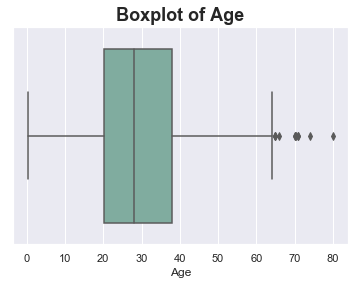

In [24]:
boxplot(titanic, 'Age', 'Boxplot of Age');

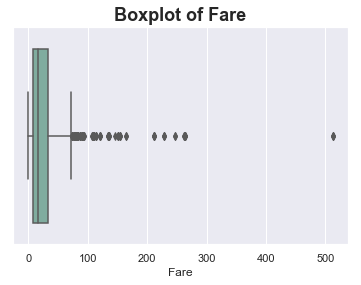

In [25]:
boxplot(titanic, 'Fare', 'Boxplot of Fare');

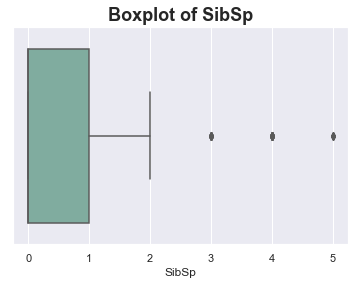

In [26]:
boxplot(titanic, 'SibSp', 'Boxplot of SibSp');

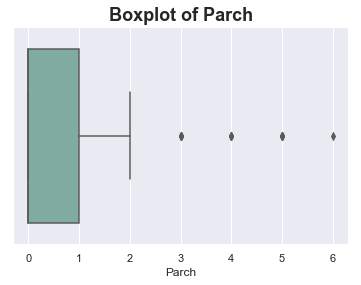

In [27]:
boxplot(titanic, 'Parch', 'Boxplot of Parch');

<a id='ebp'></a>
### Explaining the Boxplots
By analyzing the boxplots, I noticed that all four graphs reveal outliers. However, those outliers seem to be part of the data variability. For instance, the outlier in`Age` is 80, which is a possible value since a person could have an age of 80. In`Fair`, the outliers are three values of 512. Those also are possible values since the ticket price may vary based on its value. Finally, `SibSp` and `Parch` have outliers range from three to six, which also are possible values since it counts the number of people accompanied with the passenger.<br>

Now since these outliers are not due error, there is no need to remove them. However, other methods can be used to deal with outliers that are not due to error. Winsorizing is one of them, so I will winsorize all four variables and see if it is a valid solution.
 


<a id='won'></a>
### Winsorizing Variables with Outliers
I will create a new function that takes in the variable data and the winsorization level, and returns a boxplot of the winsorized data. However, I will not update the original data with winsorized data. 

In [28]:
def winsorize(data, limits, title):
    """Returns boxplot for winsorized data and the title of the graph"""
    
    win=stats.mstats.winsorize(data, limits=limits)
    title=plt.title(title, weight='bold', fontsize=18)
    ax=sns.boxplot(win, color='#D9291A')
    return ax, title


In the following cells, I am going to manipulate the limits value to obtain the desired winsorization for each variable.
For `Age`, 96% winsorization seems to be enough to fix the outliers as shown in the graph below

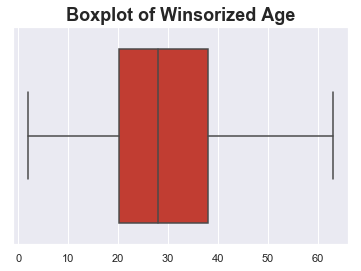

In [29]:
winsorize(titanic.Age, .02, 'Boxplot of Winsorized Age');

Now, since `Fare` is highly skewed to the right with many outliers, I found 72% winsorization is the solution. However, 72% winsorization means replacing the values of 14% of the data from the upper limit and 14% from the lower limit with maximum and minimum values respectively. Since we have 714 values, it means we are manipulating about 100 data points from each side. This seems to be an extreme treatment and may cause a bias in later analysis. Probably, other methods are required to deal with such outliers.

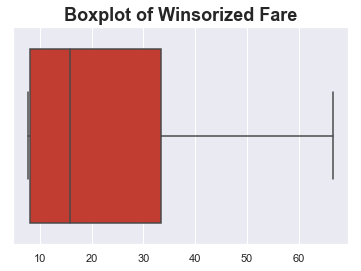

In [30]:
winsorize(titanic.Fare, .14, 'Boxplot of Winsorized Fare');

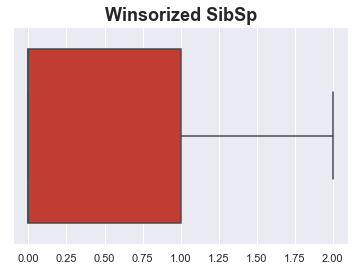

In [38]:
winsorize(titanic.SibSp, .05, 'Winsorized SibSp');

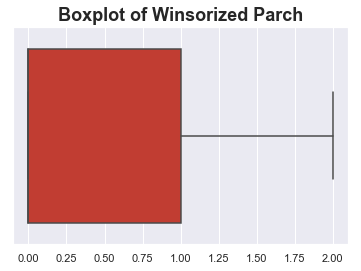

In [39]:
winsorize(titanic.Parch, .03, 'Boxplot of Winsorized Parch');

<a id='egv'></a>
## Exploring Categorical Variables
Although we have eight categorical variables, `Passengerid`, `Name`, `Ticket`, and `Cabin` are unique to each passenger so there is no need to explore them. Instead, I will explore `Survived`, `Pclass`, `Sex`, and `Embarked`.<br>
To do so, I will use a bar chart to show the frequency for each variable. Let's first create a function that returns a bar chart, title, and frequency.

In [40]:
def bar_chart(data, column, title):
    """Returns a bar char and its title"""
    
    title=plt.title(title, weight='bold', fontsize=18)
    ax=sns.countplot(x=column, data=data)
    return ax, title 
    

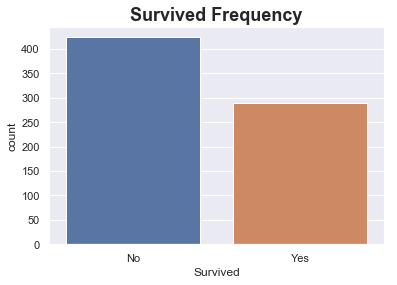

In [41]:
bar_chart(titanic, 'Survived', 'Survived Frequency');

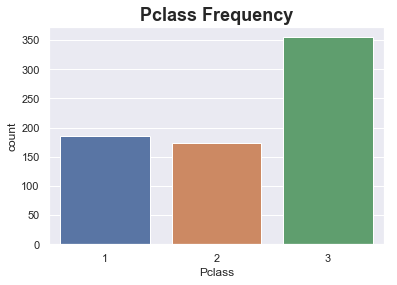

In [42]:
bar_chart(titanic,'Pclass','Pclass Frequency');

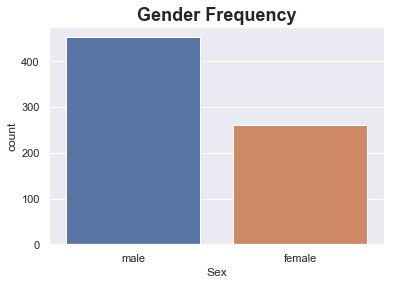

In [44]:
bar_chart(titanic, 'Sex',  'Gender Frequency');

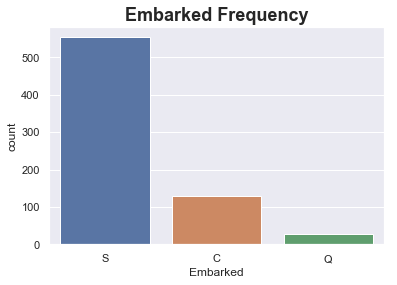

In [45]:
bar_chart(titanic, 'Embarked', 'Embarked Frequency');

<a id='is'></a>
## Inferential Statistics

<a id='hs'></a>
### Hypothesis Statement

After exploring the data, I am interested in the following variables:
-   **Survived**
-   **Sex**
-   **Pclass**

Let's re-print the first five rows of the dataset
Before starting any statistical analysis, my initial intuition is that **Sex** and **Pclass** could have an effect on the number of survivals. In other word, **Survived** is related with one or both variables.<br>

My first assumption is that women survivals are more than men survivals due to the __[women and children first](https://en.wikipedia.org/wiki/Women_and_children_first)__ protocol which states that the lives of women and children were to be saved first in a life-threatening situation, typically abandoning ship, when survival resources such as lifeboats were limited. <br>

My second assumption is that passengers from first and second class had more chance to survive due to the value of their fare. Therefore, the number of survivals from those classes is higher than those from the third class: passengers from the first and second classes could have better access to lifeboats, help from the crew, etc.<br> 

I will conduct the statistical tests on both assumptions. Since both variables on each assumption are categorical, I am going to use chi-square test for independence. Here is my hypothesis statements :<br>
     
$H_0$: `Sex` and `Survived` are independent<br>
$H_1$: `Sex` and `Survived` are dependent<br>

$H_0$: `Pclass` and `Survived` are independent<br>
$H_1$: `Pclass` and `Survived` are dependent


<a id='st'></a>
### Statistical Test

#### First Assumption

First, I am going to create a contingency table for **Sex** and **Survived**

In [46]:
contingency_table_sex=pd.crosstab(titanic.Sex, titanic.Survived, margins=True)
contingency_table_sex.columns=['no','yes','total_rows']
contingency_table_sex.index=['female', 'male', 'total_cols']
contingency_table_sex

,no,yes,total_rows
female,64,197,261
male,360,93,453
total_cols,424,290,714


I would like to see this table as graph, so I will create a bar chart to compare the survivals accross gender

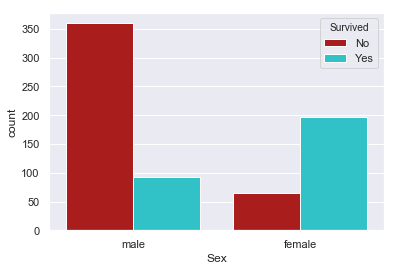

In [47]:
color=['#C10505','#18DAE0']
sns.set_palette(color)
sns.countplot(x='Sex', hue='Survived', data=titanic);

As we can see, the highest number of survivals is from women and the lowest are from men. However, I need to run the statistical test to test for significance. So let's calculate the chi-square statistics.

In [49]:
chi2_test_sex=stats.chi2_contingency(contingency_table_sex)
print(chi2_test_sex)

(207.2977760569275, 1.0129651212127807e-43, 4, array([[154.99159664, 106.00840336, 261.        ],
       [269.00840336, 183.99159664, 453.        ],
       [424.        , 290.        , 714.        ]]))


I also need to calculate the chi-square critical value  with 95% confidence interval and df=1 since the contingency table is 2x2, so df=(2-1)$*$(2-1)=1

In [50]:
chi2_critical_value_sex=stats.chi2.ppf(.95,1)
chi2_critical_value_sex

3.841458820694124

#### Second Assumption

As I did in the first assumption, I am going to create a contingency table for `Pclass` and `Survived`

In [51]:
contingency_table_pclass=pd.crosstab(titanic.Pclass, titanic.Survived, margins=True)
contingency_table_pclass.columns=['no','yes','total_rows']
contingency_table_pclass.index=['1st', '2nd', '3rd', 'total_cols']
contingency_table_pclass

,no,yes,total_rows
1st,64,122,186
2nd,90,83,173
3rd,270,85,355
total_cols,424,290,714


I will create a bar chart to compare the survivals across all three classes

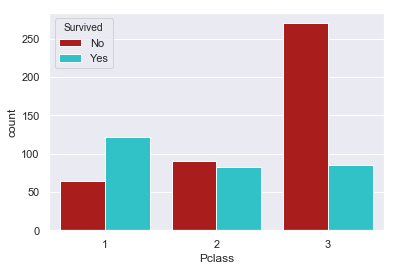

In [62]:
color=['#C10505','#18DAE0']
sns.set_palette(color)
sns.countplot(x='Pclass', hue='Survived', data=titanic);

As we can see, the highest number of survivals is from the first class and the lowest are from the third class but I still need to run the statistical test to test for significance. So let's calculate the chi-square statistics.

In [54]:
chi2_test_pclass=stats.chi2_contingency(contingency_table_pclass)
print(chi2_test_pclass)

(92.90141721143323, 7.557215792646806e-18, 6, array([[110.45378151,  75.54621849, 186.        ],
       [102.73389356,  70.26610644, 173.        ],
       [210.81232493, 144.18767507, 355.        ],
       [424.        , 290.        , 714.        ]]))


I also need to calculate the chi-square critical value  with 95% confidence interval and df=2 since the contingency table is 3x2, so df=(3-1)$*$(2-1)=2

In [55]:
chi2_critical_value=stats.chi2.ppf(.95,2)
chi2_critical_value

5.991464547107979

#### Calculating Statistical Tests for Data without Removing Missing Values

To see if removing missing values has an effect on the statistical test results, I will re-run the test for full data and see if the results would be different. I will use `titanic_original`dataset, which includes all data before removing missing values. Then, I will create new contingency tables as follows:

In [63]:
#Creating contingency table of Sex and Survived
contingency_sex_all=pd.crosstab(titanic_original.Sex, titanic_original.Survived, margins=True)
contingency_sex_all.index=('female', 'male', 'total_cols')
contingency_sex_all.columns=('No', 'Yes', 'total_rows')
contingency_sex_all

,No,Yes,total_rows
female,81,233,314
male,468,109,577
total_cols,549,342,891


In [64]:
#Creating a contingency table for Pclass and Survived
contingency_pclass_all=pd.crosstab(titanic_original.Pclass, titanic_original.Survived, margins=True)
contingency_pclass_all.index=('1st', '2nd', '3rd', 'total_cols')
contingency_pclass_all.columns=('No', 'Yes', 'total_rows')
contingency_pclass_all

,No,Yes,total_rows
1st,80,136,216
2nd,97,87,184
3rd,372,119,491
total_cols,549,342,891


Now, I will calculate the chi-square statistics for both tables as follows:

In [60]:
chi2_test_sex_all=stats.chi2_contingency(contingency_sex_all)
print(chi2_test_sex)

(207.2977760569275, 1.0129651212127807e-43, 4, array([[154.99159664, 106.00840336, 261.        ],
       [269.00840336, 183.99159664, 453.        ],
       [424.        , 290.        , 714.        ]]))


In [61]:
chi2_test_pclass_all=stats.chi2_contingency(contingency_pclass_all)
print(chi2_test_pclass)

(92.90141721143323, 7.557215792646806e-18, 6, array([[110.45378151,  75.54621849, 186.        ],
       [102.73389356,  70.26610644, 173.        ],
       [210.81232493, 144.18767507, 355.        ],
       [424.        , 290.        , 714.        ]]))


<a id='co'></a>
## Conclusion

We had a dataset of 891 rows with some missing values. The highest number of missing values was in `Cabin`, but since I did not want to include it for analysis, I did not remove its missing values. The next highest number of missing values was in `Age`, and since I was expecting to include it for analysis, I had to remove its 177 missing values. 
However, I eventually did not choose `Age` for analysis, instead, I chose `Survived`, `Sex`, `Pclass`.<br>

Now `Survived`, `Sex`, and `Pclass` had no missing values, but I removed 177 values from them when I treated the missing values in `Age`. To compensate for that, I re-ran the test with a full data set to see if removing those missing value had an effect on the result of the statistical test. By looking at the chi-square value for each situation, i.e., with and without removing missing values, the chi-square was the same, which means removing the missing values had no effect on the result of the statistical test. 

Since chi-square statistics for the first assumptions is 207.30 which is larger than chi-square critical of 3.84, we can reject the null hypothesis and conclude that there is an association between the sex of the passenger and the number of survivals, i.e., `Sex` and `Survived` are dependent.

For the second assumption, since chi-square statistics is 92.90 which is larger than chi-square critical of 5.99, we can reject the null hypothesis and conclude that there is an association between the type of class and the number of survivals, i.e., `Pclass` and `Survived` are dependent.



<a id='rf'></a>
## References
RMS Titanic. *In Wikipedia*. Retrieved October 10, 2017 from https://en.wikipedia.org/wiki/RMS_Titanic<br>

Titanic: Machine Learning from Disaster. Retrived October 10, 2017 from https://www.kaggle.com/c/titanic/data

Encyclopedia Titanica, Retrived October 12, 2017 from https://www.encyclopedia-titanica.org/


Women and Children First. *In Wikipedia*. Retrieved October 15, 2017 from https://en.wikipedia.org/wiki/Women_and_children_first
